In [19]:
#initialition
from dash import Dash, dcc, html
import plotly.express as px
import pandas as pd

# Load the dataset
data = pd.read_csv("project_final_cleaned.csv")

# Initialize the Dash app
app = Dash(__name__)

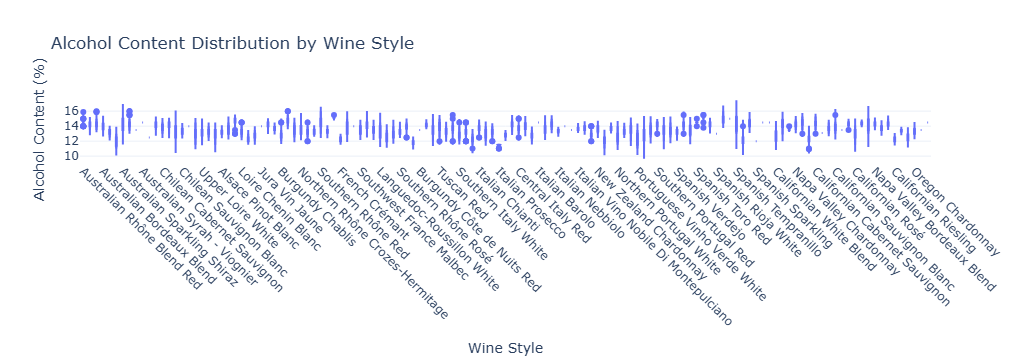

In [21]:
# 1. Bar Chart: Average wine price by region
fig_bar = px.bar(
    data.groupby("Region", as_index=False)["Price"].mean(),
    x="Region",
    y="Price",
    title="Average Wine Price by Region",
    labels={"Price": "Average Price", "Region": "Wine Region"},
    template="plotly_white"
)
fig_bar.update_layout(xaxis=dict(showticklabels=False))

# 2. Histogram: Distribution of wine ratings
fig_hist = px.histogram(
    data,
    x="Rating",
    title="Distribution of Wine Ratings",
    nbins=20,
    labels={"Rating": "Wine Rating"},
    template="plotly_white"
)

# 3. Box Plot: Distribution of wine prices by wine style
fig_box = px.box(
    data,
    x="Wine style",
    y="Price",
    title="Wine Price Distribution by Wine Style",
    labels={"Price": "Wine Price", "Wine style": "Wine Style"},
    template="plotly_white"
)
fig_box.update_xaxes(tickangle=45)

# 4. Scatter Plot: Relationship between price and number of ratings
fig_scatter = px.scatter(
    data,
    x="Number of Ratings",
    y="Price",
    title="Price vs. Number of Ratings",
    labels={"Price": "Wine Price", "Number of Ratings": "Number of Ratings"},
    template="plotly_white",
    color="Rating"
)

# 5. Violin Plot: Distribution of alcohol content by wine style
fig_violin = px.violin(
    data,
    x="Wine style",
    y="Alcohol content",
    title="Alcohol Content Distribution by Wine Style",
    labels={"Alcohol content": "Alcohol Content (%)", "Wine style": "Wine Style"},
    template="plotly_white",
    box=True
)
fig_violin.update_xaxes(tickangle=45)

In [23]:
# Layout for the dashboard
app.layout = html.Div([
    html.H1("Wine Analytics and Trends Dashboard", style={"textAlign": "center"}),

    
    html.Div([
        html.H2("1. Distribution of Wine Ratings"),
        dcc.Graph(figure=fig_hist),
    ]),
    html.Div([
        html.H2("2. Average Wine Price by Region"),
        dcc.Graph(figure=fig_bar),
    ]),
    html.Div([
        html.H2("3. Wine Price Distribution by Wine Style"),
        dcc.Graph(figure=fig_box),
    ]),

    html.Div([
        html.H2("4. Alcohol Content Distribution by Wine Style"),
        dcc.Graph(figure=fig_violin),
    ]),
        html.Div([
        html.H2("5. Price vs. Number of Ratings"),
        dcc.Graph(figure=fig_scatter),
    ])
])

# Run the app on a different port (8052)
if __name__ == "__main__":
    app.run_server(debug=True, port=8052)
